In [ ]:
%matplotlib inline

In [200]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
# from matplotlib.ticker import NullFormatter
# from sklearn import manifold, datasets
from time import time
from cycler import cycler


def plot_2d(folder_name):
    (fig, subplots) = plt.subplots(1, 2, figsize=(5, 2.5))
    M = pd.read_csv('../{}_MADELON/madelon2D.csv'.format(folder_name), index_col=0)
    W = pd.read_csv('../{}_WINE/wine2D.csv'.format(folder_name), index_col=0)
    
    green_m =  M['target']>0
    red_m =  M['target']<0

    ax = subplots[0]
    ax.set_title("TSNE - {} - Madelon".format(folder_name))

    ax.scatter(M[green_m]['x'], M[green_m]['y'], c="g", s=1)
    ax.scatter(M[red_m]['x'], M[red_m]['y'], c="r", s=1)
    ax.axis('tight')

    green_w =  W['target']==1
    red_w =  W['target']==0

    ax = subplots[1]
    ax.set_title("TSNE - {} - Wine".format(folder_name))

    ax.scatter(W[green_w]['x'], W[green_w]['y'], c="g", s=1)
    ax.scatter(W[red_w]['x'], W[red_w]['y'], c="r", s=1)
    ax.axis('tight')


    
def initial_clustering():
    folder_name=''
    (fig, subplots) = plt.subplots(2, 2, figsize=(5, 5))
    fig.suptitle('Clustering without Dim. Reduction', y=1)
    
    M_S = pd.read_csv('../BASE_MADELON/SSE.csv'.format(folder_name), index_col=0)
    W_S = pd.read_csv('../BASE_WINE/SSE.csv'.format(folder_name), index_col=0)

    M_L = pd.read_csv('../BASE_MADELON/logliklihood.csv'.format(folder_name), index_col=0)
    W_L = pd.read_csv('../BASE_WINE/logliklihood.csv'.format(folder_name), index_col=0)

    ax = subplots[0][0]
    ax.set_title("SSE - BASE - Madelon".format(folder_name), y=1.08)
    ax.plot(M_S.index, M_S['Madelon SSE (left)'])

    ax = subplots[0][1]
    ax.set_title("SSE - BASE - Wine".format(folder_name), y=1.08)
    ax.plot(W_S.index, W_S['Wine SSE (left)'])
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    ax = subplots[1][0]
    ax.set_title("LogL - BASE - Madelon".format(folder_name), y=1.08)
    ax.plot(M_L.index, M_L['Madelon log-likelihood'])
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    ax = subplots[1][1]
    ax.set_title("LogL - BASE - Wine".format(folder_name), y=1.08)
    ax.plot(W_L.index, W_L['Wine log-likelihood'])
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    plt.subplots_adjust(hspace=0.5, wspace=0.35)
    
def scree(folder_name):
    mpl.rcParams.update(mpl.rcParamsDefault)
    (fig, subplots) = plt.subplots(1, 2, figsize=(5, 2.5))
    fig.suptitle('Dimensionality Reduction Scree', y=1.08)

    M = pd.read_csv('../{}_MADELON/madelon scree.csv'.format(folder_name), index_col=0)
    W = pd.read_csv('../{}_WINE/wine scree.csv'.format(folder_name), index_col=0)

    ax = subplots[0]
    ax.set_title("{} - Madelon".format(folder_name))
    ax.stem(M.index, M.iloc[:,0])

    ax = subplots[1]
    ax.set_title("{} - Wine".format(folder_name))
    ax.stem(W.index, W.iloc[:,0])
    plt.subplots_adjust(wspace=0.5)
    
def scree_rp():
    folder_name='RP'
    (fig, subplots) = plt.subplots(2, 2, figsize=(5, 2.5))
    fig.suptitle('Dimensionality Reduction Scree', y=1.08)

    M_1 = pd.read_csv('../{}_MADELON/madelon scree1.csv'.format(folder_name), index_col=0)
    W_1 = pd.read_csv('../{}_WINE/wine scree1.csv'.format(folder_name), index_col=0)
    M_2 = pd.read_csv('../{}_MADELON/madelon scree2.csv'.format(folder_name), index_col=0)
    W_2 = pd.read_csv('../{}_WINE/wine scree2.csv'.format(folder_name), index_col=0)

    ax = subplots[0][0]
    ax.set_title("{} - Madelon (1)".format(folder_name))
    ax.stem(M_1.index, M_1.iloc[:,0])

    ax = subplots[0][1]
    ax.set_title("{} - Wine (1)".format(folder_name))
    ax.stem(W_1.index, W_1.iloc[:,0])

    ax = subplots[1][0]
    ax.set_title("{} - Madelon (2)".format(folder_name))
    ax.stem(M_2.index, M_2.iloc[:,0])

    ax = subplots[1][1]
    ax.set_title("{} - Wine (2)".format(folder_name))
    ax.stem(W_2.index, W_2.iloc[:,0])
    
    plt.subplots_adjust(hspace=0.65)
    
def clust_with_dimred(clustering, dataset): 
    plt.subplots_adjust(wspace=0.3)
    (fig, subplots) = plt.subplots(1, 2, figsize=(5, 2.5))
    
    plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y', 'c'])))
    
    dim_red1 = ['BASE']
    dim_red2 = ['PCA', 'ICA', 'RP', 'RF']
    cl_dict = {'K-means':['SSE','SSE (left)','SSE'],'EM':['LogL','log-likelihood','logliklihood']}

    fig.suptitle('{} - {}'.format(clustering, dataset), y=1.08)
    
    ax = subplots[0]
    ax.set_xlabel('Clusters')
    ax.set_ylabel(cl_dict[clustering][0])
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    ax.grid()
    
    for alg in dim_red1:
        filename = cl_dict[clustering][2]
        d = pd.read_csv('../{}_{}/{}.csv'.format(alg, dataset, filename), index_col=0)
        categ = '{} {}'.format(dataset, cl_dict[clustering][1])
        ax.plot(d.index, d[categ], '-', label=alg)
        
    ax.legend(loc='best') 
    
    ax = subplots[1]
    ax.set_xlabel('Clusters')
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    ax.grid()
    
    for alg in dim_red2:
        filename = cl_dict[clustering][2]
        d = pd.read_csv('../{}_{}/{}.csv'.format(alg, dataset, filename), index_col=0)
        categ = '{} {}'.format(dataset, cl_dict[clustering][1])
        ax.plot(d.index, d[categ], '-', label=alg)

        
    ax.legend(loc='best') 

In [ ]:
plot_2d('BASE')
plot_2d('PCA')
plot_2d('ICA')
plot_2d('RP')
plot_2d('RF')

In [ ]:
initial_clustering()

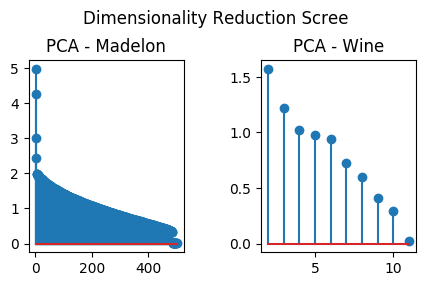

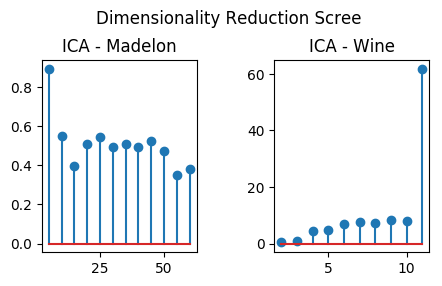

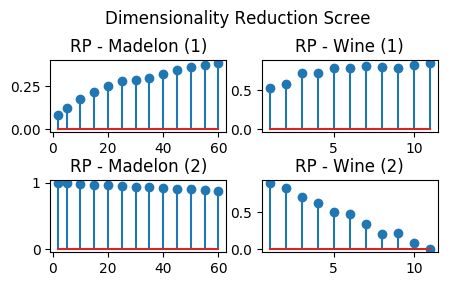

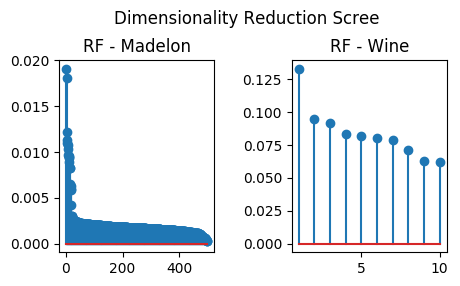

In [201]:
scree('PCA')
scree('ICA')
scree_rp()
scree('RF')

<Figure size 432x288 with 0 Axes>

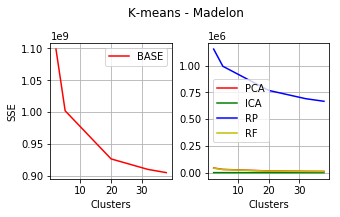

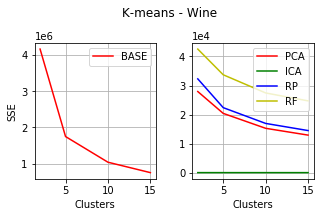

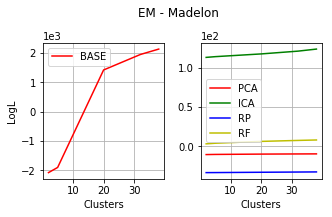

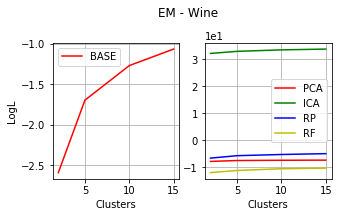

In [180]:
clust_with_dimred('K-means','Madelon')
clust_with_dimred('K-means','Wine')
clust_with_dimred('EM','Madelon')
clust_with_dimred('EM','Wine')